In [26]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
df = pd.read_excel('/content/Diabetes dataset (2).xlsx')
print(df.shape)

X = df.drop('target', axis=1).to_numpy()
y = df['target'].to_numpy()

print(X.shape)
print(y.shape)


(442, 11)
(442, 10)
(442,)


In [29]:
X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [30]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [31]:
print("Intercept/W_not of Lr is :",reg.intercept_)
print("Coeff/W_all of LR is :",reg.coef_)

Intercept/W_not of Lr is : 151.88331005254167
Coeff/W_all of LR is : [  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]


In [32]:
class GDRegressor:
  def __init__(self,learning_rate,epochs):
    self.w_not = None
    self.coef_ = None
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self, X_train, y_train):
    self.w_not = 0
    self.coef_ = np.ones(X_train.shape[1])

    for i in range(self.epochs):
      y_hat = np.dot(X_train,self.coef_) + self.w_not
      intercept_der = -2 *np.mean(y_train - y_hat)
      self.w_not = self.w_not - (self.lr*intercept_der)

      coef_der = -2 * np.dot( (y_train - y_hat), X_train)/X_train.shape[0]
      self.coef_ = self.coef_ - (self.lr*coef_der)

    print("Intercept or w_not of GD is :",self.w_not)
    print("Coeff or w_all of GD is :",self.coef_)


  def predict(self,X_test):
    return (np.dot(X_test, self.coef_) + self.w_not)

In [33]:
print(X_train.shape)
print(y_train.shape)

(353, 10)
(353,)


In [34]:
gd = GDRegressor(0.5, 1000)
gd.fit(X_train,y_train)

Intercept or w_not of GD is : 152.01351687661833
Coeff or w_all of GD is : [  14.38990585 -173.7235727   491.54898524  323.91524824  -39.32648042
 -116.01061213 -194.04077415  103.38135565  451.63448787   97.57218278]


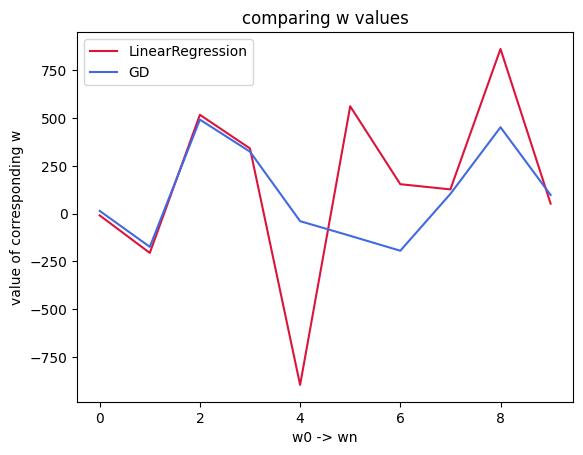

In [35]:
plt.plot(reg.coef_, color='crimson', label = 'LinearRegression')
plt.plot(gd.coef_, color='royalblue', label ='GD')
plt.legend()
plt.title('comparing w values')
plt.xlabel('w0 -> wn')
plt.ylabel('value of corresponding w')
plt.show()

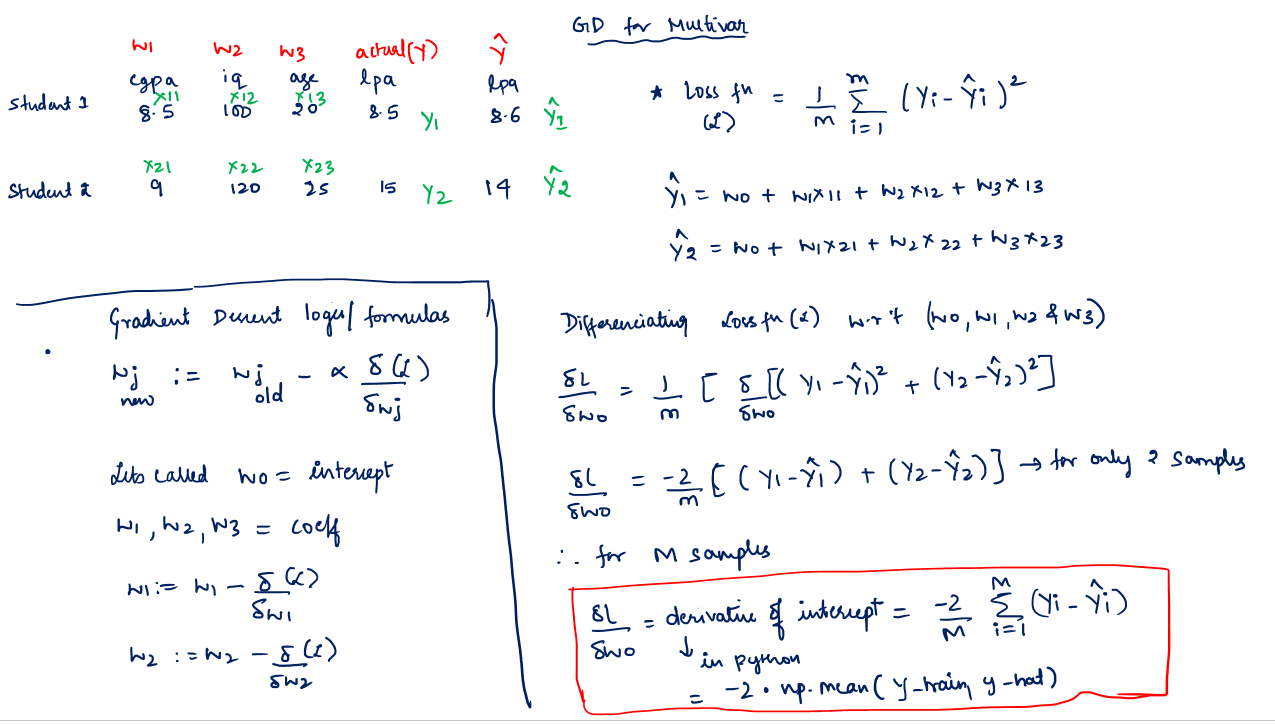

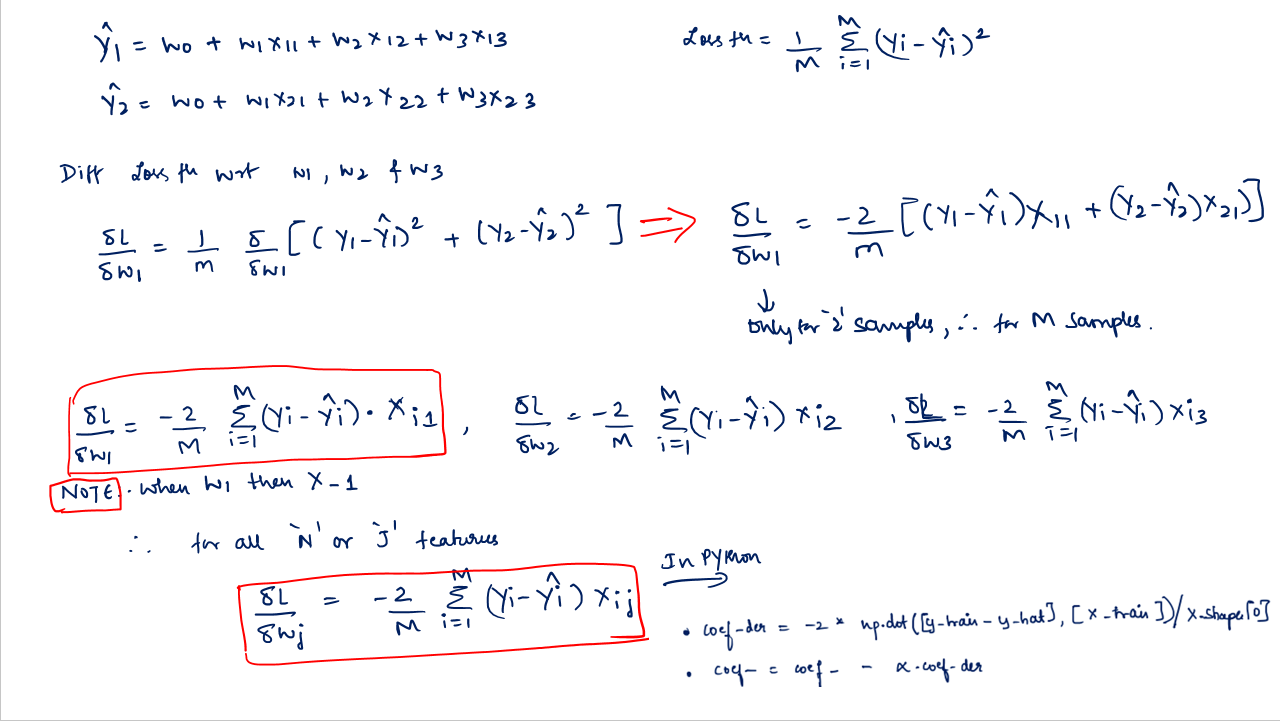